In [1]:
import pandas as pd

data_edge = pd.read_csv("edges.tsv", sep = '\t')

In [2]:
data_edge

,Source,Target,Kin,Label,Type
0,10879,33843,N,Biographer of,Directed
1,10879,33843,N,Biographer of,Directed
2,10879,35003,N,Friend of,Directed
3,10879,56579,N,Wrote kuangji (Grave Inscription) for,Directed
4,10879,65899,N,Biographer of,Directed
...,...,...,...,...,...
1997,34747,217457,K,B-,Directed
1998,34747,217458,K,B-,Directed
1999,34747,217460,K,B-,Directed
2000,34747,217461,K,B-,Directed


In [3]:
data_node = pd.read_csv('nodes.tsv', sep = '\t')

In [4]:
data_node

,Id,Name,ChineseName,IndexYear,BirthYear,DeathYear,Woman
0,10879,Chen Jiru,陳繼儒,1617,1558.0,1639.0,No
1,33843,Lu Shusheng,陸樹聲,1568,1509.0,1605.0,No
2,34717,Wang Shizhen,王世貞,1585,1526.0,1590.0,No
3,34736,Wang Shiqi,王士騏,1619,0.0,0.0,No
4,35003,Dong Qichang,董其昌,1614,1555.0,1636.0,No
...,...,...,...,...,...,...,...
394,30290,Hai Mao,海瑁,1573,0.0,0.0,No
395,30315,He Mengchun,何孟春,1533,1474.0,1536.0,No
396,30316,He Zhongfang,何仲方,1558,0.0,0.0,No
397,128816,Zhou Tingyong,周廷用,1534,1482.0,1534.0,No


In [5]:
import re
# let's load the text in from file
with open('pride.txt', 'r', encoding='utf8') as rf:
    text = rf.read()

text = text[text.find("Chapter 61")+len("Chapter 61"):text.find("End of the Project Gutenberg EBook")].strip()
text = re.sub(r'\n {6}', ' ', text)
text = text.replace(".", "")

# How do we divide this text:
chapters = re.split(r"Chapter \d{1,2}", text)

# divide into paragraphs
paragraphs = text.split("\n")


In [6]:
import itertools 
with open('characters.txt', 'r', encoding='utf8') as rf:
    characters = rf.read().split("\n")
    characters = [character.split(", ") for character in characters]

# save edge information
character_assoc_dictionary = dict()

for chapter in paragraphs:
    appears = []
    for character in characters:
        for name in character:
            if name in chapter:
                appears.append(character[0])
                break
    relationships = itertools.combinations(sorted(appears),2)
    for relationship in relationships:
        if relationship in character_assoc_dictionary:
            character_assoc_dictionary[relationship] += 1
        else:
            character_assoc_dictionary[relationship] = 1

[('Elizabeth Bennet', 'Mr Fitzwilliam Darcy', {'weight': 96}), ('Elizabeth Bennet', 'Catherine "Kitty" Bennet', {'weight': 57}), ('Elizabeth Bennet', 'Jane Bennet', {'weight': 106}), ('Elizabeth Bennet', 'Lydia Bennet', {'weight': 43}), ('Elizabeth Bennet', 'Mary Bennet', {'weight': 13}), ('Elizabeth Bennet', 'Mr Bennet', {'weight': 15}), ('Elizabeth Bennet', 'Mrs Bennet', {'weight': 46}), ('Elizabeth Bennet', 'Mr William Collins', {'weight': 57}), ('Elizabeth Bennet', 'Charlotte Lucas', {'weight': 33}), ('Elizabeth Bennet', 'Lady Catherine de Bourgh', {'weight': 4}), ('Elizabeth Bennet', 'Caroline Bingley', {'weight': 2}), ('Elizabeth Bennet', 'Mrs M Gardiner', {'weight': 21}), ('Elizabeth Bennet', 'Mr Edward Gardiner', {'weight': 12}), ('Elizabeth Bennet', 'Colonel Fitzwilliam', {'weight': 12}), ('Elizabeth Bennet', 'George Wickham', {'weight': 1}), ('Elizabeth Bennet', 'Georgiana Darcy', {'weight': 6}), ('Mr Fitzwilliam Darcy', 'Mrs Bennet', {'weight': 6}), ('Mr Fitzwilliam Darcy', 

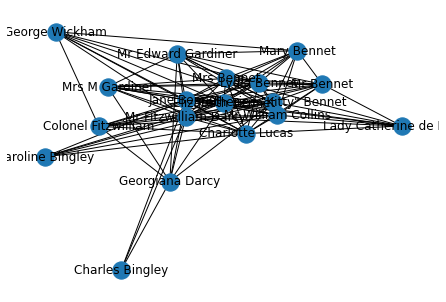

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for character in characters:
    G.add_node(character[0])

for edge, weight in character_assoc_dictionary.items():
    G.add_edge(edge[0], edge[1], weight=weight)

print(G.edges().data())

nx.draw(G,with_labels=True)
plt.show()

In [8]:
# helper function to load data in from file
def get_data(filename):
    # use a context manager to load in the data
    with open(filename, 'r', encoding='utf8') as rf:
        # transform file into string and split along new line
        lines = rf.read().split("\n")

        # separate each line along the tab characters
        data = [line.split("\t") for line in lines]

        # grab the header
        header = data[0]

        # delete header from data
        data = data[1:]
    
    # return header and data
    return header, data

# load data in from file
node_header, node_data = get_data('nodes.tsv')
edge_header, edge_data = get_data('edges.tsv')

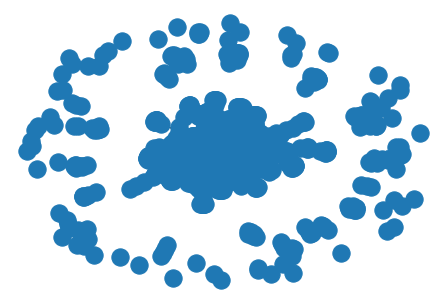

In [9]:
# create graph object
G = nx.Graph()

# add node information to the graph
for node in node_data:
    # add nodes one by one, with id, name, chinese name, and index year
    G.add_node(int(node[0]), name=node[1], cname=node[2], indexyear=int(node[3]))

# add edge information to the graph
for edge in edge_data:
    # add edge one by one, node 1, node 2, kin, and label
    G.add_edge(int(edge[0]), int(edge[1]), kin=edge[2], label=edge[3])

# metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# visualize this
nx.draw_spring(G)
plt.show()